# ML UVA Project: Predicting Opioid Overdoses in VA

In [1]:
# Import some common packages
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix # optional
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# from google.colab import drive
# drive.mount('/content/gdrive')

In [2]:
# to make this notebook's output stable across runs
np.random.seed(42)

# file_path_google = "/content/gdrive/My Drive/ML_Project/clean_opioid.csv"
file_path_local = "clean_opioid.csv"


df = pd.read_csv(file_path_local)
print(df.head())
print(df.head())
print(df.info())
print(df.describe())

    fips  Diagnosed HIV  ED Heroin Overdose  ED Opioid Overdose  EMS Narcan  \
0  51001            3.0                 6.1                60.7        48.6   
1  51003            2.8                 8.4                84.2        15.9   
2  51005            6.4                 0.0               218.0        12.8   
3  51007            7.7                 0.0                54.2        23.2   
4  51009            6.3                 0.0                79.0        19.0   

   Fatal Fentanyl and/or Heroin Overdose  Fatal Prescription Opioid Overdose  \
0                                   12.1                                12.1   
1                                    0.9                                 0.9   
2                                    6.4                                12.8   
3                                    7.7                                 0.0   
4                                    3.2                                 6.3   

   Reported Hepatitis C (18-30 year olds)  p

                                            fips  Diagnosed HIV  \
fips                                    1.000000       0.224897   
Diagnosed HIV                           0.224897       1.000000   
ED Heroin Overdose                      0.209240       0.111642   
ED Opioid Overdose                      0.136897       0.049938   
EMS Narcan                              0.478540       0.186004   
Fatal Fentanyl and/or Heroin Overdose   0.239031       0.262313   
Fatal Prescription Opioid Overdose      0.042518      -0.026189   
Reported Hepatitis C (18-30 year olds) -0.078049       0.031140   
p_rate                                  0.521259      -0.103041   
Average Household size                 -0.047172       0.031753   
High School graduate or higher          0.133456      -0.111182   
Veterans                               -0.028071       0.122025   
With Disability                        -0.131097      -0.074326   
Foreign Born                            0.283065       0.11602

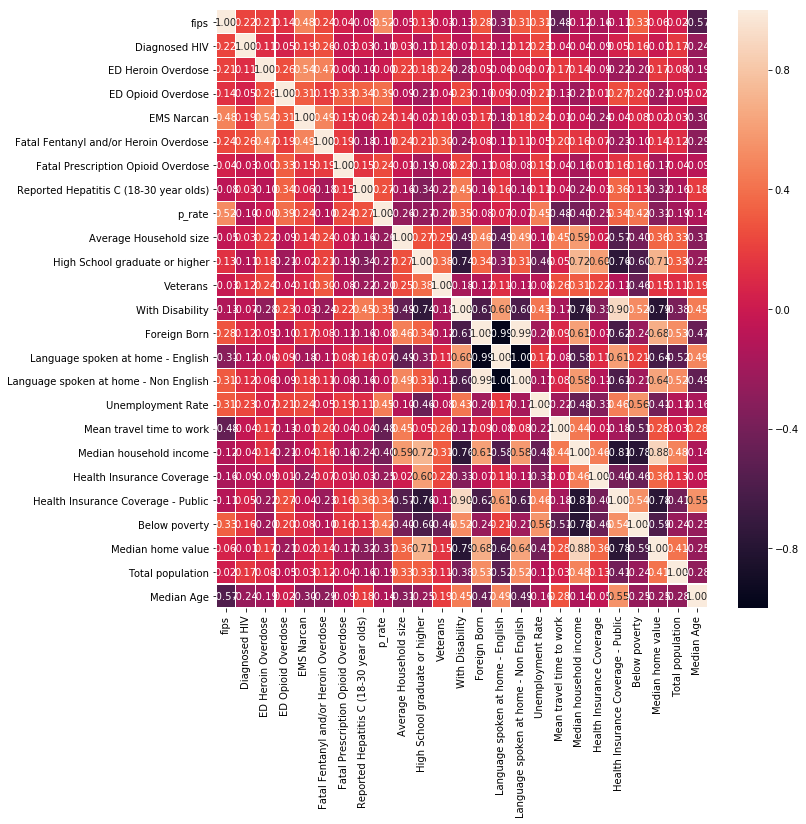

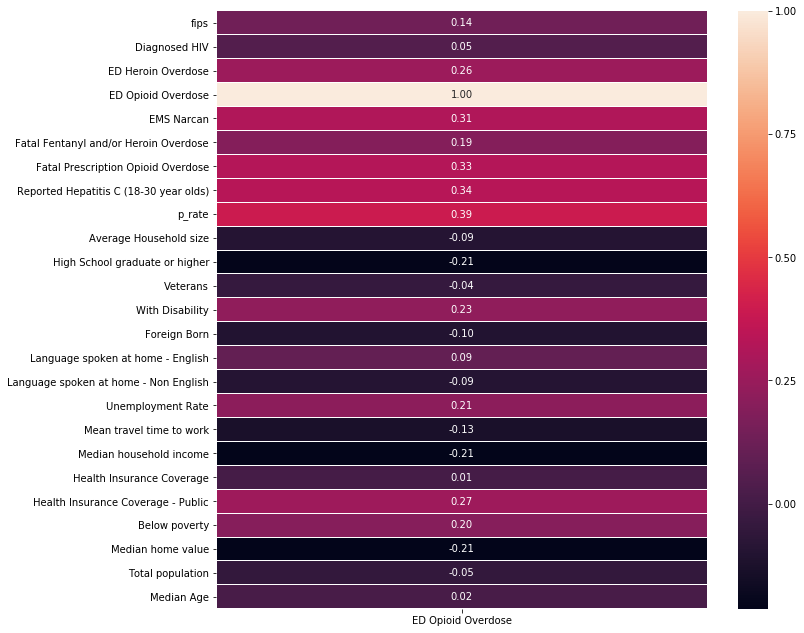

In [3]:
print(df.corr())
# pd.plotting.scatter_matrix(df, figsize=(12, 12), diagonal="kde")

# plot corr graphs
fig, ax = plt.subplots(figsize=(11, 11))
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f')
plt.show()

# plot corr ed opioid
fig, ax = plt.subplots(figsize=(11, 11))
sns.heatmap(df.corr()["ED Opioid Overdose"].to_frame(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f')
plt.show()

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
# print("Before NA removed:", df.shape)
# df = df.dropna()
# print("After NA removed:", df.shape)
# df = df[df.locality_name != "Galax City"]
x_data, y_data = df.drop(["ED Opioid Overdose", "locality_name", "fips"], axis=1), df["ED Opioid Overdose"]
y_data /= 10000

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")), #impute missing values
        ('std_scaler', StandardScaler()),
])
x_clean = num_pipeline.fit_transform(x_data)
# print("NAs:", x_clean.isna().sum())
# print(np.isnan(x_clean))
# print(np.any(np.isnan(x_clean)))

x_train, x_test, y_train, y_test = train_test_split(x_clean, y_data, test_size=0.2, random_state=42)
# print(x_train)
# print(y_train)



Random Forest: 0.007806727400449871
Decision Tree: 0.009084566701857267
linear rmse: 0.007891794517258296
linear r2: 0.31601475592149375


C:\Users\Vincent\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


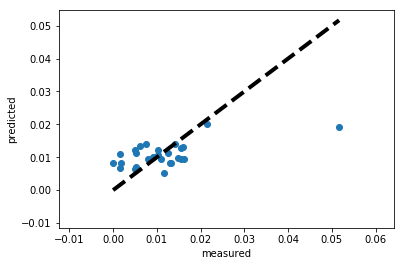

linear rmse: 0.00955695036920369
linear r2: -0.0030760390590474085


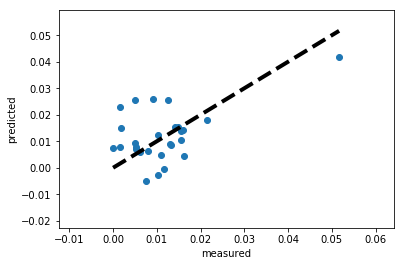

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import export_graphviz

RF = RandomForestRegressor(random_state=42)
RF.fit(x_train, y_train)
pred = RF.predict(x_test)
print("Random Forest RMSE: " + str(np.sqrt(mean_squared_error(y_test, pred))))

DF = DecisionTreeRegressor(random_state=42)
DF.fit(x_train, y_train)
pred = DF.predict(x_test)
print("Decision Tree RMSE: " + str(np.sqrt(mean_squared_error(y_test, pred))))

# SGD = SGDRegressor(learning_rate='optimal',max_iter=3000, tol=.0000003, early_stopping=False, eta0=.0002, loss="squared_epsilon_insensitive")
# SGD.fit(x_train, y_train)
# pred = SGD.predict(x_test)
# print(np.sqrt(mean_squared_error(y_test, pred)))

lr = LinearRegression()
lr.fit(x_train,y_train)
y_predict = lr.predict(x_test)
print("Linear RMSE: "  + str(np.sqrt(mean_squared_error(y_test, y_predict))))
print("Linear R^2: " + str(r2_score(y_test, y_predict)))
fig, ax = plt.subplots()
ax.scatter(y_test, y_predict)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

poly = PolynomialFeatures(2)
poly_x_train = poly.fit_transform(x_train)
poly_x_test = poly.fit_transform(x_test)
lr = LinearRegression()
lr.fit(poly_x_train,y_train)
y_predict = lr.predict(poly_x_test)
print("Polynomial RMSE: "  + str(np.sqrt(mean_squared_error(y_test, y_predict))))
print("Polynomial R^2: " + str(r2_score(y_test, y_predict)))
fig, ax = plt.subplots()
ax.scatter(y_test, y_predict)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

In [6]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LassoCV, Lasso

alphas = 10**np.linspace(6,-2,50)*0.5
lasso = Lasso(max_iter=10000, normalize=True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(x_clean, y_data)
    coefs.append(lasso.coef_)
    
np.shape(coefs)

# Use the cross-validation package to split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(x_clean, y_data, test_size=0.2, random_state=42)

lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(X_train, y_train)
lasso.set_params(alpha=lassocv.alpha_)
print("Alpha=", lassocv.alpha_)
lasso.fit(X_train, y_train)
print("mse = ",mean_squared_error(y_test, lasso.predict(X_test)))
print("best model coefficients:")
pd.Series(lasso.coef_, index=x_data.columns)

Alpha= 4.413497547373275e-05
mse =  7.2554697340384e-05
best model coefficients:


Diagnosed HIV                             0.000000
ED Heroin Overdose                        0.002103
EMS Narcan                                0.000000
Fatal Fentanyl and/or Heroin Overdose     0.000249
Fatal Prescription Opioid Overdose        0.001802
Reported Hepatitis C (18-30 year olds)    0.000167
p_rate                                    0.000786
Average Household size                   -0.000000
High School graduate or higher           -0.000000
Veterans                                 -0.000000
With Disability                           0.000000
Foreign Born                              0.000000
Language spoken at home - English        -0.000000
Language spoken at home - Non English     0.000000
Unemployment Rate                         0.000000
Mean travel time to work                 -0.000317
Median household income                  -0.000000
Health Insurance Coverage                 0.000625
Health Insurance Coverage - Public        0.001643
Below poverty                  

In [7]:
df2 = pd.read_csv("nat_data.csv")
print(df2.head())
print(df2.head())
print(df2.info())
print(df2.describe())

   fips opioid_presc_rate  total_population  average_household_size  \
0  2016                 –              5684                    3.59   
1  2020              66.3            299107                    2.77   
2  2050                 –             17776                    3.86   
3  2060                 –               970                    2.50   
4  2068                 –              2060                    2.34   

   percent_grad_high_school  median_household_income  perc_male  \
0                  0.839560                  84306.0   0.596939   
1                  0.929868                  78326.0   0.511931   
2                  0.789602                  51012.0   0.526046   
3                  0.919877                  79750.0   0.570103   
4                  0.952278                  81544.0   0.546602   

   perc_foreign_born  poverty_population     f  overdose_death_rate_2  
0           0.353976                 499  20.0                  19.05  
1           0.099640      

In [8]:
df2 = df2.replace('–', np.nan)
df2 = df2.dropna(subset=['overdose_death_rate_2'])
# df2 = df2.drop(["f"], axis=1)
print(df2.head())
print(df2.head())
print(df2.info())
print(df2.describe())


   fips opioid_presc_rate  total_population  average_household_size  \
0  2016               NaN              5684                    3.59   
1  2020              66.3            299107                    2.77   
2  2050               NaN             17776                    3.86   
3  2060               NaN               970                    2.50   
4  2068               NaN              2060                    2.34   

   percent_grad_high_school  median_household_income  perc_male  \
0                  0.839560                  84306.0   0.596939   
1                  0.929868                  78326.0   0.511931   
2                  0.789602                  51012.0   0.526046   
3                  0.919877                  79750.0   0.570103   
4                  0.952278                  81544.0   0.546602   

   perc_foreign_born  poverty_population     f  overdose_death_rate_2  
0           0.353976                 499  20.0                  19.05  
1           0.099640      

In [9]:
x_data, y_data = df2.drop(["overdose_death_rate_2", "fips"], axis=1), df2["overdose_death_rate_2"]
y_data /= 100

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")), #impute missing values
        ('std_scaler', StandardScaler()),
])
x_clean = num_pipeline.fit_transform(x_data)
# print("NAs:", x_clean.isna().sum())
# print(np.isnan(x_clean))
# print(np.any(np.isnan(x_clean)))

x_train, x_test, y_train, y_test = train_test_split(x_clean, y_data, test_size=0.2, random_state=42)
# print(x_train)
# print(y_train)

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

RF = RandomForestRegressor(random_state=42)
RF.fit(x_train, y_train)
pred = RF.predict(x_test)
print("Random Forest: " + str(np.sqrt(mean_squared_error(y_test, pred))))

DF = DecisionTreeRegressor(random_state=42)
DF.fit(x_train, y_train)
pred = DF.predict(x_test)
print("Decision Tree: " + str(np.sqrt(mean_squared_error(y_test, pred))))

dot_data = StringIO()
export_graphviz(DF, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# SGD = SGDRegressor(learning_rate='optimal',max_iter=3000, tol=.0000003, early_stopping=False, eta0=.0002, loss="squared_epsilon_insensitive")
# SGD.fit(x_train, y_train)
# pred = SGD.predict(x_test)
# print(np.sqrt(mean_squared_error(y_test, pred)))

lr = LinearRegression()
lr.fit(x_train,y_train)
y_predict = lr.predict(x_test)
print("Linear RMSE: "  + str(np.sqrt(mean_squared_error(y_test, y_predict))))
print("Linear R^2: " + str(r2_score(y_test, y_predict)))
fig, ax = plt.subplots()
ax.scatter(y_test, y_predict)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

poly = PolynomialFeatures(2)
poly_x_train = poly.fit_transform(x_train)
poly_x_test = poly.fit_transform(x_test)
lr = LinearRegression()
lr.fit(poly_x_train,y_train)
y_predict = lr.predict(poly_x_test)
print("Polynomial RMSE: "  + str(np.sqrt(mean_squared_error(y_test, y_predict))))
print("Polynomial R^2: " + str(r2_score(y_test, y_predict)))
fig, ax = plt.subplots()
ax.scatter(y_test, y_predict)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

Random Forest: 1.6226029063251806e-16
Decision Tree: 3.953992527640358e-16


C:\Users\Vincent\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


InvocationException: GraphViz's executables not found